# S16
This is a iPython Notebook document, associated to the S16 figure in the Support Information of the manuscript:
# PALMA, an improved algorithm for the DOSY signal processing
Afef cherni, Émilie chouzenoux, Marc-André Delsuc 

In [4]:
##############################
# Import bib
##############################
import numpy as np
import matplotlib.pylab as plt
import matplotlib.mlab as mlab
%matplotlib inline
import time
import scipy
import Code.scene as scene 
import Code.PALMA as PALMA
##############################
# Parametres
##############################
N = 256
M = 64
delta = 2E-3
Delta = 50E-3
Dmin = 1.0
Dmax = 1000.0
D= 16
full_output = False
nbiter = 200000
prec = 1E-14
################################################################### noise = 10^-2
noise = 0.1 #noise = 1%
##############################
# C1 et C2 Mesures
##############################
Lap_axis = scene.laplace_axis(N,Dmin,Dmax)
t = scene.t_linear(D, Delta, N=M)
t = t.reshape((M,1))
K = np.exp(-np.kron(t,Lap_axis.T))
Kt = np.transpose(K)
KtK = np.dot(Kt,K)
B = np.identity(N)
B = B + KtK
Binv = np.linalg.inv(B)
np.random.seed(1234)
#C2
x_Xu2 = scene.scene_Xu_ass(N, Dmin, Dmax, width=4)
x_Xu2 = x_Xu2.reshape((N,1))
z2 = np.dot(K,x_Xu2) 
sigma2 = noise*z2[0]
y2_2 = z2 + sigma2*np.random.randn(M,1)
eta2_2 = 1.01*np.sqrt(M)*sigma2
################################################################### noise = 10^-3
noise = 0.001 #noise = 0.1%
##############################
# C1 et C2 Mesures
##############################
Lap_axis = scene.laplace_axis(N,Dmin,Dmax)
t = scene.t_linear(D, Delta, N=M)
t = t.reshape((M,1))
K = np.exp(-np.kron(t,Lap_axis.T))
Kt = np.transpose(K)
KtK = np.dot(Kt,K)
B = np.identity(N)
B = B + KtK
Binv = np.linalg.inv(B)
np.random.seed(1234)
#C2
x_Xu2 = scene.scene_Xu_ass(N, Dmin, Dmax, width=4)
x_Xu2 = x_Xu2.reshape((N,1))
z2 = np.dot(K,x_Xu2) 
sigma2 = noise*z2[0]
y2_3 = z2 + sigma2*np.random.randn(M,1)
eta2_3 = 1.01*np.sqrt(M)*sigma2
################################################################### noise = 10^-4
noise = 0.0001 #noise = 0.01%
##############################
# C1 et C2 Mesures
##############################
Lap_axis = scene.laplace_axis(N,Dmin,Dmax)
t = scene.t_linear(D, Delta, N=M)
t = t.reshape((M,1))
K = np.exp(-np.kron(t,Lap_axis.T))
Kt = np.transpose(K)
KtK = np.dot(Kt,K)
B = np.identity(N)
B = B + KtK
Binv = np.linalg.inv(B)
np.random.seed(1234)
#C2
x_Xu2 = scene.scene_Xu_ass(N, Dmin, Dmax, width=4)
x_Xu2 = x_Xu2.reshape((N,1))
z2 = np.dot(K,x_Xu2) 
sigma2 = noise*z2[0]
y2_4 = z2 + sigma2*np.random.randn(M,1)
eta2_4 = 1.01*np.sqrt(M)*sigma2
################################################################### noise = 10^-5
noise = 0.00001 #noise = 0.001%
##############################
# C1 et C2 Mesures
##############################
Lap_axis = scene.laplace_axis(N,Dmin,Dmax)
t = scene.t_linear(D, Delta, N=M)
t = t.reshape((M,1))
K = np.exp(-np.kron(t,Lap_axis.T))
Kt = np.transpose(K)
KtK = np.dot(Kt,K)
B = np.identity(N)
B = B + KtK
Binv = np.linalg.inv(B)
np.random.seed(1234)
#C2
x_Xu2 = scene.scene_Xu_ass(N, Dmin, Dmax, width=4)
x_Xu2 = x_Xu2.reshape((N,1))
z2 = np.dot(K,x_Xu2) 
sigma2 = noise*z2[0]
y2_5 = z2 + sigma2*np.random.randn(M,1)
eta2_5 = 1.01*np.sqrt(M)*sigma2
################################################################### 
lamdaopt = 0.01
xrec2 , criters2 = PALMA.PPXAplus(K, Binv, y2_2, eta2_2, nbiter, lamda=lamdaopt, prec=prec, full_output=full_output)
xrec3 , criters2 = PALMA.PPXAplus(K, Binv, y2_3, eta2_3, nbiter, lamda=lamdaopt, prec=prec, full_output=full_output)
xrec4 , criters2 = PALMA.PPXAplus(K, Binv, y2_4, eta2_4, nbiter, lamda=lamdaopt, prec=prec, full_output=full_output)
xrec5 , criters2 = PALMA.PPXAplus(K, Binv, y2_5, eta2_5, nbiter, lamda=lamdaopt, prec=prec, full_output=full_output)

PALMA.py:69: RuntimeWarning: invalid value encountered in log
  s = x*(1 - np.log(x)/(1+x)) + A/(1+x-limit)**0.75
PALMA.py:69: RuntimeWarning: invalid value encountered in power
  s = x*(1 - np.log(x)/(1+x)) + A/(1+x-limit)**0.75


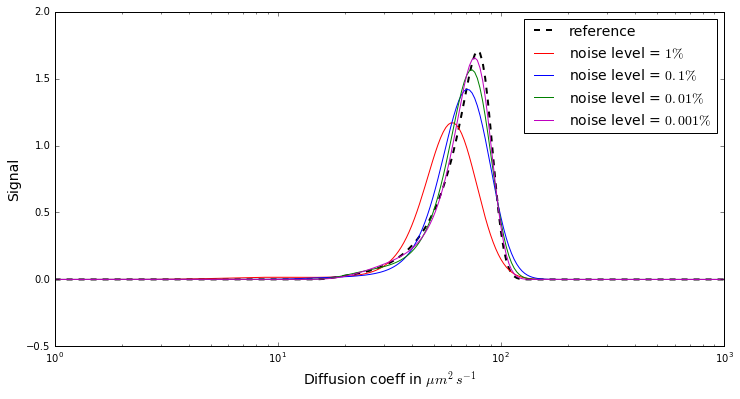

In [5]:
plt.figure(figsize=(12,6))
plt.semilogx(Lap_axis, x_Xu2, 'k--', linewidth=2, label="reference")
plt.semilogx(Lap_axis, xrec2, 'r-', linewidth=1, label="noise level = $1 \%$")
plt.semilogx(Lap_axis, xrec3, 'b-', linewidth=1, label="noise level = $0.1 \%$")
plt.semilogx(Lap_axis, xrec4, 'g-', linewidth=1, label="noise level = $0.01 \%$")
plt.semilogx(Lap_axis, xrec5, 'm-', linewidth=1, label="noise level = $0.001 \%$")
plt.xlabel('Diffusion coeff in $\mu m^2 \, s^{-1}$', fontsize=14)
plt.ylabel('Signal', fontsize=14)
plt.legend(fontsize=14)
plt.savefig('SE_2.eps', format='eps', dpi=1000)